<a href="https://colab.research.google.com/github/Shahed1995/DL_PyTorch/blob/master/Cancer_Classification_Model_for_Android_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [ ]:
img_height, img_width = 256, 280
batch_size = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/Dataset/train/",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/Dataset/validation/",
    image_size = (img_height, img_width),
    batch_size = batch_size
)
test_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/Dataset/test/",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 2364 files belonging to 3 classes.
Found 660 files belonging to 3 classes.
Found 660 files belonging to 3 classes.


In [ ]:
class_names = train_ds.class_names
print(class_names)

['.ipynb_checkpoints', 'benign', 'malignant']


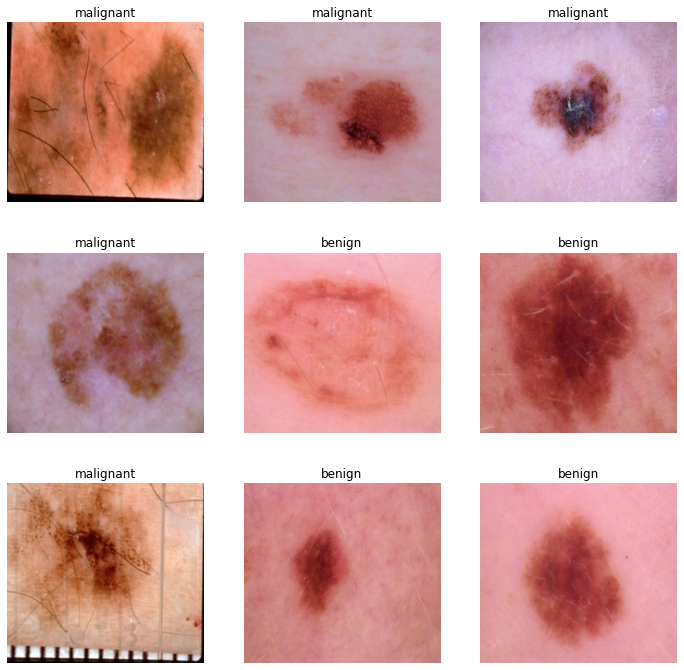

In [ ]:
class_names = ["","benign", "malignant"]
plt.figure(figsize=(12,12))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i+1 )
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.Rescaling(1./255),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Conv2D(32, 3, activation="relu"),
     tf.keras.layers.MaxPooling2D(),
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation="relu"),
     tf.keras.layers.Dense(3)
    ]
)


In [ ]:
model.compile(
    optimizer="adam",
    loss=tf.losses.SparseCategoricalCrossentropy(from_logits = True),
    metrics=['accuracy']
)

In [ ]:
model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = 10
)

Epoch 1/10
74/74 [==============================] - 208s 3s/step - loss: 0.7188 - accuracy: 0.6235 - val_loss: 0.4666 - val_accuracy: 0.7682
Epoch 2/10
74/74 [==============================] - 207s 3s/step - loss: 0.4981 - accuracy: 0.7568 - val_loss: 0.5732 - val_accuracy: 0.7091
Epoch 3/10
74/74 [==============================] - 207s 3s/step - loss: 0.4289 - accuracy: 0.7991 - val_loss: 0.4300 - val_accuracy: 0.7591
Epoch 4/10
74/74 [==============================] - 204s 3s/step - loss: 0.4225 - accuracy: 0.8025 - val_loss: 0.3574 - val_accuracy: 0.8045
Epoch 5/10
74/74 [==============================] - 206s 3s/step - loss: 0.3983 - accuracy: 0.8050 - val_loss: 0.3558 - val_accuracy: 0.8045
Epoch 6/10
74/74 [==============================] - 206s 3s/step - loss: 0.3449 - accuracy: 0.8376 - val_loss: 0.3793 - val_accuracy: 0.7985
Epoch 7/10
74/74 [==============================] - 204s 3s/step - loss: 0.3335 - accuracy: 0.8393 - val_loss: 0.3403 - val_accuracy: 0.8379
Epoch 8/10
74

In [ ]:
model.evaluate(test_ds)

21/21 [==============================] - 15s 686ms/step - loss: 0.3943 - accuracy: 0.8030


[0.3942711651325226, 0.8030303120613098]

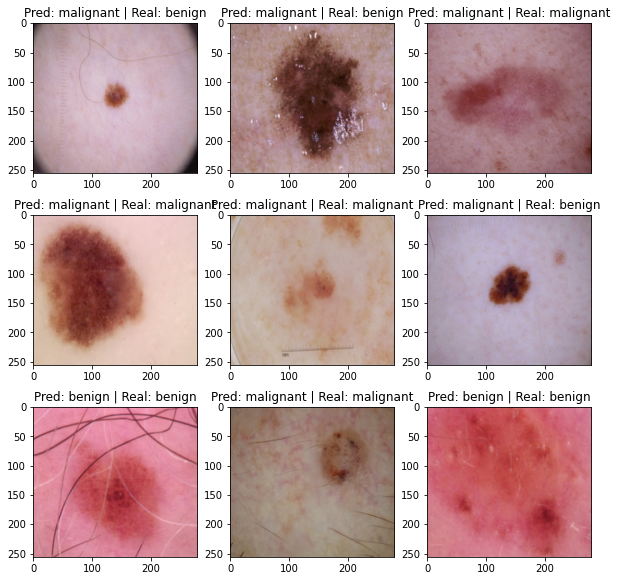

In [ ]:
import numpy

plt.figure(figsize=(10,10))
for images, labels in test_ds.take(1):
  classifications = model(images)
  
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    index = numpy.argmax(classifications[i])
    plt.title("Pred: " + class_names[index] + " | Real: " + class_names[labels[i]])

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmpz3ihf1et/assets
